In [103]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df=pd.merge(ride_df, city_df, how="inner", on="city")
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

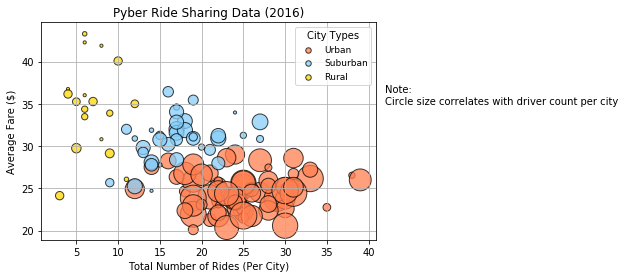

In [104]:
# Obtain the x and y coordinates for each of the three city types
avg_fare=city_ride_df.groupby(["type","city", "driver_count"])["fare"].mean()
total_rides=city_ride_df.groupby(["type", "city", "driver_count"])["ride_id"].count()


df = pd.DataFrame({"Avg Fare":avg_fare, "Total Rides":total_rides}).reset_index()

urban =plt.scatter(x=df[df["type"]=="Urban"]["Total Rides"], y=df[df["type"]=="Urban"]["Avg Fare"], label="Urban", s=(df[df["type"]=="Urban"]["driver_count"])*10, color="coral", edgecolors="black", alpha=.75 )
suburban =plt.scatter(x=df[df["type"]=="Suburban"]["Total Rides"], y=df[df["type"]=="Suburban"]["Avg Fare"], label="Suburban", s=(df[df["type"]=="Suburban"]["driver_count"])*10, color="lightskyblue", edgecolors="black", alpha=.75)
rural =plt.scatter(x=df[df["type"]=="Rural"]["Total Rides"], y=df[df["type"]=="Rural"]["Avg Fare"], label="Rural", s=(df[df["type"]=="Rural"]["driver_count"])*10, color="gold", edgecolors="black", alpha=.75 )

plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,35,"Note: \nCircle size correlates with driver count per city")


lgnd=plt.legend(scatterpoints=1, title="City Types", fontsize=9)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()



# Save Figure


## Total Fares by City Type

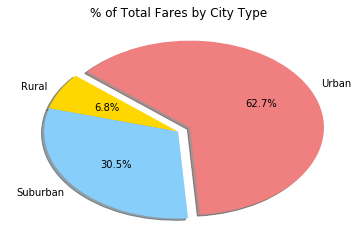

In [105]:
# Calculate Type Percents
each=city_ride_df.groupby("type")["fare"].sum()
every=each.sum()
percent=round((each/every)*100,1)
explode=(0,0,.1)
colors=["gold", "lightskyblue", "lightcoral"]
labels=["Rural", "Suburban", "Urban"]
plt.pie(percent, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.show()
# Build Pie Chart

# Save Figure


## Total Rides by City Type

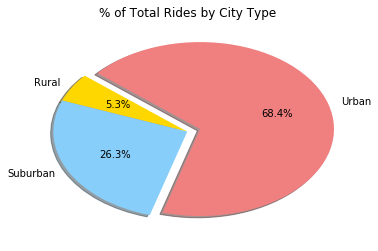

In [106]:
# Calculate Ride Percents
each_ride=city_ride_df.groupby("type")["ride_id"].count()
every_ride=each_ride.sum()
percent_rides=round((each_ride/every_ride)*100,1)
explode=(0,0,.1)
colors=["gold", "lightskyblue", "lightcoral"]
labels=["Rural", "Suburban", "Urban"]
plt.pie(percent_rides, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.show()
# Build Pie Chart

# Save Figure


## Total Drivers by City Type

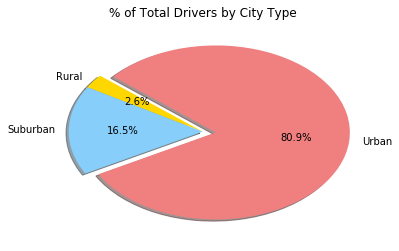

In [109]:
# Calculate Driver Percents
each_dc=city_df.groupby("type")["driver_count"].sum()
every_dc=each_dc.sum()
percent_dc=round((each_dc/every_dc)*100,1)
explode=(0,0,.1)
colors=["gold", "lightskyblue", "lightcoral"]
labels=["Rural", "Suburban", "Urban"]
plt.pie(percent_dc, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.show()
# Build Pie Charts

# Save Figure
